In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import r2_score, mean_squared_error 
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("../data/cleaned_climate_data.csv")
df.head()



,Area,Item,Year,Avg_rainfall,Pesticides(tonnes),Avg_Temp,Crop_Yield(hectares)
0,Albania,Maize,1990,1485,121.0,16.37,36613
1,Albania,Potatoes,1990,1485,121.0,16.37,66667
2,Albania,Rice,1990,1485,121.0,16.37,23333
3,Albania,Paddy,1990,1485,121.0,16.37,23333
4,Albania,Sorghum,1990,1485,121.0,16.37,12500


In [3]:
#Defining the  features and target
# Convert hg/ha to tons/ha (1 hg = 0.1 kg, so 10000 hg = 1 ton)
# Ensure yield is in tons/ha
df['Crop_Yield(hectares)'] = df['Crop_Yield(hectares)'] * 0.0001

# Define features and target

X = df[['Avg_Temp', 'Avg_rainfall', 'Pesticides(tonnes)']]   # independent variables
y = df['Crop_Yield(hectares)']                               # target variable


In [4]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=42)
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 23218
Testing samples: 5805


In [5]:
#Training Linear Regression
lin_reg= LinearRegression()
lin_reg.fit(X_train, y_train)



,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [6]:
#Training Random Forest
rf_reg= RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [7]:
# Making predicitons
y_pred_lr = lin_reg.predict(X_test)
y_pred_rf= rf_reg.predict(X_test)

def evaluate_model(y_true, y_pred, name):
    r2=r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true,y_pred))
    print(f"{name} → R²: {r2:.3f}, RMSE: {rmse:.3f}")



In [8]:
#evaluating the models
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")

#R^2 close to 1 means better fit
#RMSE --> lower= better accuracy

Linear Regression → R²: 0.016, RMSE: 8.077
Random Forest → R²: -0.199, RMSE: 8.917


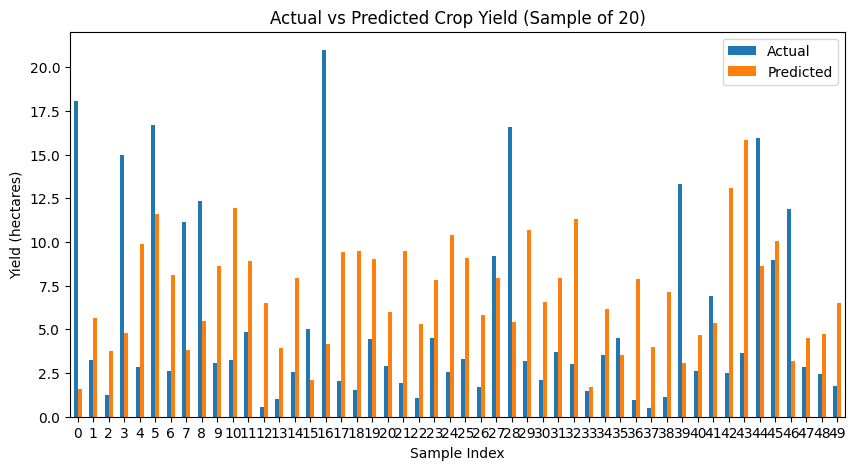

In [9]:
#actual vs predicted comaprison
comparison_df = pd.DataFrame({'Actual': y_test.values[:50], 'Predicted': y_pred_rf[:50]})
comparison_df.plot(kind='bar', figsize=(10,5))
plt.title("Actual vs Predicted Crop Yield (Sample of 20)")
plt.xlabel("Sample Index")
plt.ylabel("Yield (hectares)")
plt.xticks(rotation=0)
plt.show()




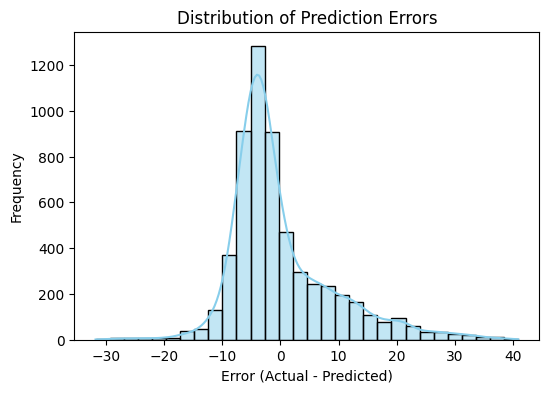

In [10]:
#error depiction
errors = y_test - y_pred_rf
plt.figure(figsize=(6,4))
sns.histplot(errors, bins=30, kde=True, color="skyblue")
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.show()


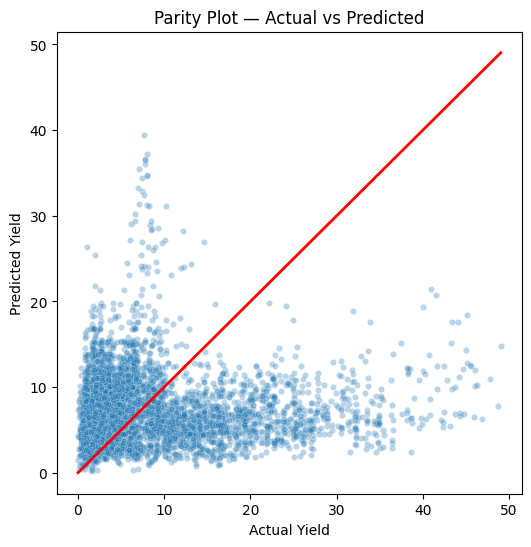

In [11]:
#perfect-line comaprison
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.3, s=20)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Parity Plot — Actual vs Predicted")
plt.show()


In [12]:
#saving the trained model
import joblib

# Save best performing model
joblib.dump(rf_reg, "../models/trained_model.joblib")
print("Model saved successfully!")

print("MODELING SUMMARY")
print("-" * 30)
print("Linear Regression → simpler, interpretable")
print("Random Forest → more accurate, used for final dashboard")


Model saved successfully!
MODELING SUMMARY
------------------------------
Linear Regression → simpler, interpretable
Random Forest → more accurate, used for final dashboard
